<img src='https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png' alt="SUT logo" width=300 height=300 align=center class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3 - Hidden Markov Model  <br>
<font color=696880 size=4>
Parsa Sharifi

# Personal Data


In [1]:
# Set your student number and name
student_number = 401107613
Name = 'Kimia'
Last_Name = 'Vanaei'

In [1]:
!pip install hmmlearn

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [4]:
# Define a function to plot the hidden states
def plot_hidden_states(model, X, lengths=None):
    hidden_states = model.predict(X, lengths)

    fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(10, 8))
    colors = plt.cm.get_cmap("viridis", model.n_components)

    for i, ax in enumerate(axs):
        mask = hidden_states == i
        ax.plot(X[mask], ".-", color=colors(i), ms=6, label=f"Hidden State {i}")
        ax.set_title(f"Hidden State {i}")
        ax.legend()

    plt.xlabel("Time Step")
    plt.show()


In [5]:
# Define the parameters of a more complex HMM with 4 hidden states and 4 possible observations

# Transition probabilities (4x4 matrix for 4 hidden states)
A = np.array([
    [0.6, 0.1, 0.2, 0.1],
    [0.2, 0.5, 0.2, 0.1],
    [0.1, 0.3, 0.4, 0.2],
    [0.3, 0.2, 0.2, 0.3]
])

# Emission probabilities (4x4 matrix for 4 states and 4 observations)
B = np.array([
    [0.5, 0.2, 0.2, 0.1],
    [0.1, 0.3, 0.4, 0.2],
    [0.2, 0.4, 0.1, 0.3],
    [0.3, 0.1, 0.3, 0.3]
])

# Initial probabilities for 4 states
pi = np.array([0.4, 0.3, 0.2, 0.1])

# Generate a longer sequence of observations for more complexity
observations = np.array([0, 1, 3, 2, 1, 0, 3, 3, 1, 2, 0, 1, 2, 3, 0, 1, 2, 2, 3, 1])


In [6]:
def viterbi(obs, A, B, pi):
    """
    Viterbi algorithm to find the most probable sequence of hidden states.

    Parameters:
    obs : list or np.array
        Sequence of observed states.
    A : 2D numpy array
        State transition probability matrix (N x N where N is the number of states).
    B : 2D numpy array
        Observation probability matrix (N x M where M is the number of observations).
    pi : 1D numpy array
        Initial state distribution (N,).

    Returns:
    Z : list
        The most probable sequence of hidden states.
    T1 : 2D numpy array
        Probability of the most likely path so far.
    T2 : 2D numpy array
        Backpointer to keep track of the states.
    """
    N = A.shape[0]  # Number of states
    T = len(obs)    # length of the observation sequence

    T1 = np.zeros((N, T))  # matrix to store the probability of the most likely path
    T2 = np.zeros((N, T), dtype=int)  # Backpointer matrix to store the state sequence

    # calculate the probability of the initial state at time 0
    for i in range(N):
        T1[i, 0] = pi[i] * B[i, obs[0]]
        T2[i, 0] = 0  # No previous state for time 0

    # calculate the probabilities for each time step t
    for t in range(1, T):
        for j in range(N):
            max_prob = -1
            max_state = -1
            for i in range(N):
                prob = T1[i, t - 1] * A[i, j] * B[j, obs[t]]
                if prob > max_prob:
                    max_prob = prob
                    max_state = i
            T1[j, t] = max_prob
            T2[j, t] = max_state

    # find the most probable last state
    Z = np.zeros(T, dtype=int)
    Z[T - 1] = np.argmax(T1[:, T - 1]) 

    # reconstruct the most probable sequence of states
    for t in range(T - 2, -1, -1):
        Z[t] = T2[Z[t + 1], t + 1]

    return Z, T1, T2

In [7]:
# Run the Viterbi algorithm
optimal_path, T1, T2 = viterbi(observations, A, B, pi)
print("Optimal state sequence (from scratch):", optimal_path)

Optimal state sequence (from scratch): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1]


Use hmmlearn and check the results:

In [8]:
# Using hmmlearn CategoricalHMM to check the results
try:

    # Initialize a Hidden Markov Model with 4 hidden states
    model = hmm.CategoricalHMM(n_components=4)

    # Set the model's initial state probabilities
    model.startprob_ = pi

    # Set the transition probability matrix for the model
    model.transmat_ = A

    # Set the emission probability matrix, which defines probabilities of observations given each state
    model.emissionprob_ = B

    # Reshape the observations to match the expected input shape for hmmlearn (each observation as a separate row)
    observations_reshaped = observations.reshape(-1, 1)

    # Use the Viterbi algorithm to decode the sequence and find the most likely state sequence
    state_sequence = model.predict(observations_reshaped)

    # Print the resulting optimal state sequence determined by the model
    print("Optimal state sequence (using hmmlearn):", state_sequence)

    # Comparison of results
    assert np.array_equal(optimal_path, state_sequence), "Mismatch between custom implementation and hmmlearn!"
    print("Both implementations yield the same optimal state sequence.")

except AttributeError:
    print("CategoricalHMM is not available in this hmmlearn version. Consider downgrading hmmlearn or using another library like pomegranate.")


Optimal state sequence (using hmmlearn): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1]
Both implementations yield the same optimal state sequence.


Apply plot_hidden_states function and explain the results:

C:\Users\ASUS\AppData\Local\Temp\ipykernel_58920\3232562646.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("viridis", model.n_components)


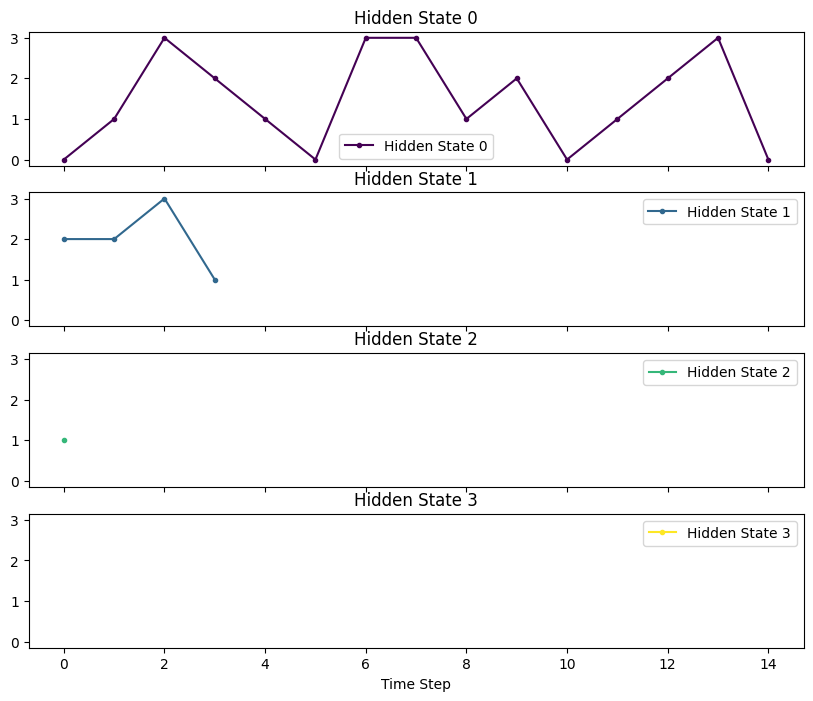

In [9]:
plot_hidden_states(model, observations_reshaped)

**Explanation Of The Previous Result** 

The plot shows how the observations are assigned to hidden states over time, aligning with the most probable state sequence [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1]. Hidden state 0 dominates the first 15 time steps, indicating it represents the most stable or frequent behavior in the data. At time step 15, there is a brief transition to hidden state 2, followed by a shift to hidden state 1 for the remaining time steps. Hidden state 3 does not appear in this sequence, showing it was not used for these observations. The plot visualizes these transitions and the persistence of each state clearly, matching the sequence provided by the model.

Now apply forward-backward algorithm:

In [10]:

def forward_backward(obs, A, B, pi):
    """
    Forward-Backward algorithm for HMMs.

    Parameters:
    obs : list
        Sequence of observed states (encoded as integers).
    A : 2D numpy array
        State transition probability matrix.
    B : 2D numpy array
        Observation probability matrix.
    pi : 1D numpy array
        Initial state distribution.

    Returns:
    gamma : 2D numpy array
        Posterior probabilities of states at each time step.
    """
    N = A.shape[0]  # Number of states
    T = len(obs)    # Number of observations

    # initial probabilities
    alpha = np.zeros((N, T))
    alpha[:, 0] = pi * B[:, obs[0]]  
    
    # Step 1: Forward
    for t in range(1, T):
        for j in range(N):
            alpha[j, t] = np.sum(alpha[:, t-1] * A[:, j]) * B[j, obs[t]]

    # Step 2: Backward 
    beta = np.zeros((N, T))
    beta[:, T-1] = 1 
    for t in range(T-2, -1, -1):
        for i in range(N):
            beta[i, t] = np.sum(A[i, :] * B[:, obs[t+1]] * beta[:, t+1])

    # Step 3: posterior probabilities (gamma)
    gamma = np.zeros((N, T))
    for t in range(T):
        denominator = np.sum(alpha[:, t] * beta[:, t])  # Sum over all states at time t
        for i in range(N):
            gamma[i, t] = (alpha[i, t] * beta[i, t]) / denominator

    return gamma, alpha, beta


In [11]:
gamma, alpha, beta = forward_backward(observations, A, B, pi)
print("Posterior probabilities (gamma):", gamma)

Posterior probabilities (gamma): [[0.6146384  0.2848885  0.12835068 0.19955361 0.28907633 0.4095703
  0.14934406 0.10727323 0.17449579 0.2549887  0.48195597 0.27425174
  0.22183932 0.19962298 0.41576692 0.23393826 0.18015695 0.18966306
  0.13228975 0.18590041]
 [0.11813748 0.2232025  0.29284317 0.48576923 0.3255039  0.13374932
  0.20577366 0.27536529 0.37242092 0.44231516 0.15747749 0.28523268
  0.44327498 0.27145712 0.14723399 0.31266142 0.52991664 0.52592256
  0.343536   0.35434612]
 [0.1725203  0.43644251 0.37232498 0.11682914 0.31845804 0.27250425
  0.42082444 0.40141187 0.3786388  0.09911533 0.20470527 0.37797665
  0.13113364 0.29125424 0.25100225 0.3899755  0.11076301 0.1066552
  0.34424573 0.39476224]
 [0.09470382 0.05546649 0.20648117 0.19784803 0.06696172 0.18417613
  0.22405784 0.21594961 0.07444448 0.20358081 0.15586127 0.06253893
  0.20375206 0.23766565 0.18599684 0.06342482 0.1791634  0.17775918
  0.17992852 0.06499124]]
